In [1]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
tags = ['2024-04-22-15-50-58']
filters = {"tags": {"$in": tags}, "state": "finished"}
runs = api.runs(entity + "/" + project, filters=filters)
runs


<Runs ajzero/AlphaZero>

In [6]:
run = api.run("ajzero/AlphaZero/d98ca3ru")
runs = [run]

In [7]:
data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)
df

100%|██████████| 1/1 [00:00<00:00, 491.42it/s]

,Training/Value_Simularities,Evaluation/Timesteps,Self_Play/Mean_Timesteps,Self_Play/Entropies,Self_Play/EMA_Discounted_Return,visit_counts,Training/Replay_Buffer_Size,Self_Play/Total_Timesteps,Training/Policy_loss,value_network,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,0.90777,"{'bins': [99.5, 99.515625, 99.53125, 99.546875...",21.666667,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0...",-20.855749,"{'format': 'png', 'height': 480, 'sha256': '2e...",60,130,0.862699,"{'format': 'png', 'height': 480, 'sha256': 'bf...",...,0.3,1,identity,coordinate,0.000001,PolicyPUCT,6,mvc,10,identity


In [8]:
df["Evaluation/Trajectories"]

0    [[60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, ...
Name: Evaluation/Trajectories, dtype: object

In [9]:
df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']
# group the data by policy combination and extract a dict trajo = {$policy_combination: trajectories} where trajectories is a merge of all the lists in the trajectories column for each group
# Step 1: Group the DataFrame by 'policy_combination'
grouped = df.groupby('policy_combination')['Evaluation/Trajectories']

# Step 2: Aggregate the trajectories lists within each group
aggregated_trajectories = grouped.sum()

# Step 3: Convert the aggregated groups to a dictionary
trajos = aggregated_trajectories.to_dict()
trajos

{'mvc+PolicyPUCT': [[60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60]]}

In [10]:

trajectories = trajos["mvc+PolicyPUCT"]
trajectories

[[60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60]]

In [11]:
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col

ncols, nrows = df["ncols"][0], 6
# trajectories is list of trajectories where each trajectory is list of states

visits = np.zeros((nrows, ncols), dtype = int)
for trajectory in trajectories:
    for state in trajectory:
        row, col = obs_to_cords(state, ncols = ncols)
        visits[row, col] += 1

visits

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [12]:
density = visits / visits.sum()
density

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

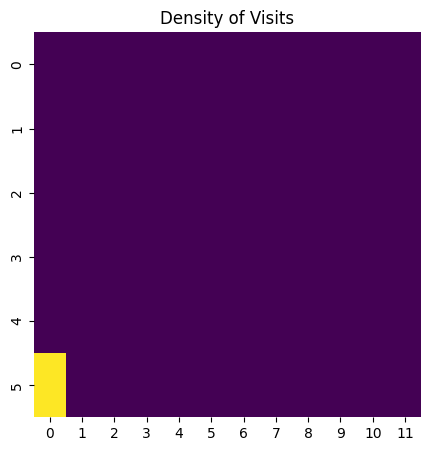

In [13]:
# render env heatmap with density
plt.figure(figsize=(5, 5))
# remove the numbers on x and y axis
sns.heatmap(density, annot=False, cmap="viridis", cbar=False)
plt.title("Density of Visits")
plt.show()

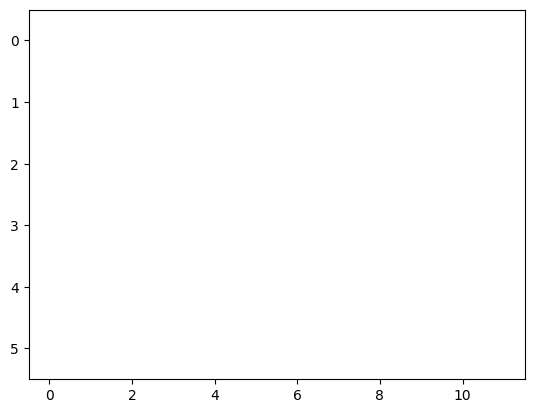

In [14]:
# Define offsets for each trajectory to reduce overlap
offsets = np.linspace(-0.1, 0.1, len(trajectories))

# Create a plot
fig, ax = plt.subplots()
ax.set_xlim(-0.5, ncols-0.5)
ax.set_ylim(-0.5, nrows-0.5)

ax.invert_yaxis()  # Invert the y-axis so the top-left is (0,0)

# Plot each trajectory with offset
for idx, (trajectory, offset) in enumerate(zip(trajectories, offsets)):
    coords = [obs_to_cords(state, ncols) for state in trajectory]
    rows, cols = zip(*coords)
    # Apply the offset
    cols = [col + offset for col in cols]
    rows = [row + offset for row in rows]
    ax.plot(cols, rows, label=f'Trajectory {idx+1}')


plt.show()

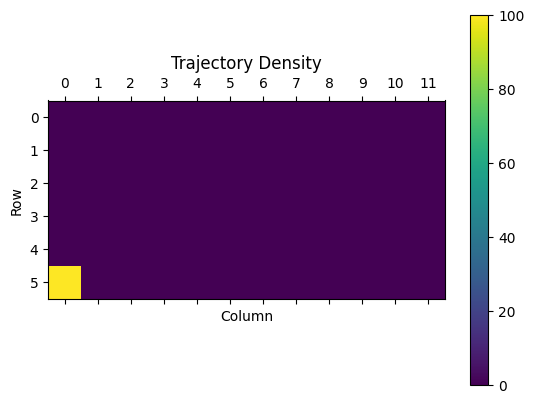

In [15]:
# Initialize the grid matrix
density = np.zeros((nrows, ncols))

# Increment the density for each state visited in each trajectory
for trajectory in trajectories:
    for state in trajectory:
        row, col = obs_to_cords(state, ncols)
        density[row, col] += 1

# Create a heatmap
fig, ax = plt.subplots()
cax = ax.matshow(density, cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))
ax.set_xticklabels(range(ncols))
ax.set_yticklabels(range(nrows))
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_title('Trajectory Density')

plt.show()

In [16]:
# plot heatmap of the density

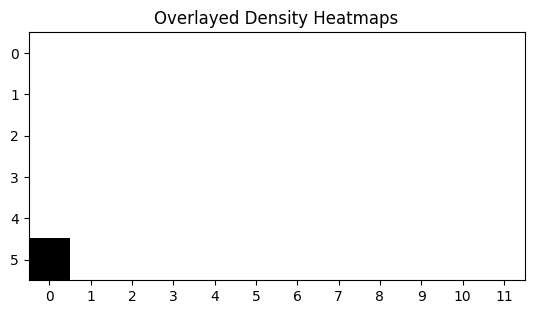

In [17]:
def calculate_density(trajectories, ncols, nrows):
    density = np.zeros((nrows, ncols))
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            density[row, col] += 1
    return density
fig, ax = plt.subplots()
alpha = 1.0  # Transparency level
cmaps = ['Reds', 'Blues', 'Greens', 'Oranges', 'Purples', 'Greys']
for trajectory_name in trajos.keys():
    trajectories = trajos[trajectory_name]
    density = calculate_density(trajectories, ncols, nrows)
    ax.imshow(density, cmap=cmaps.pop(), alpha=alpha)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))
ax.set_title('Overlayed Density Heatmaps')

plt.show()

TypeError: 'Axes' object is not subscriptable

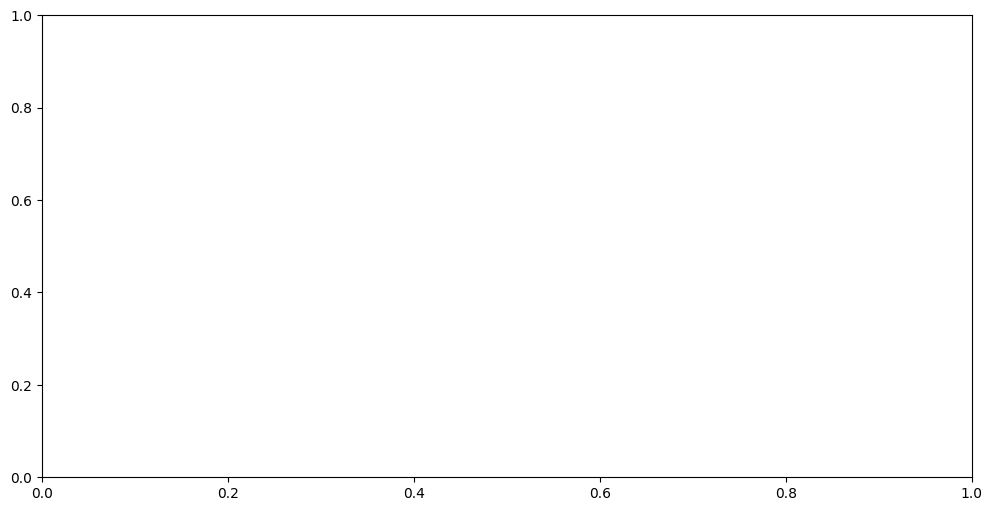

In [18]:
# create subplots where each subplot is a heatmap of the density of visits for a trajectory. use seaborn, matplotlib or any other library

heatmaps = len(trajos)

fig, axs = plt.subplots(1, heatmaps, figsize=(ncols*heatmaps, nrows))
for idx, (trajectory_name, trajectories) in enumerate(trajos.items()):
    density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
    sns.heatmap(density, ax=axs[idx], cmap='Greens', cbar=False, annot=True, fmt='.1f')
    axs[idx].set_title(trajectory_name)
    axs[idx].set_xticks(range(ncols))
    axs[idx].set_yticks(range(nrows))

# save as svg
# plt.savefig('density_heatmaps.svg')

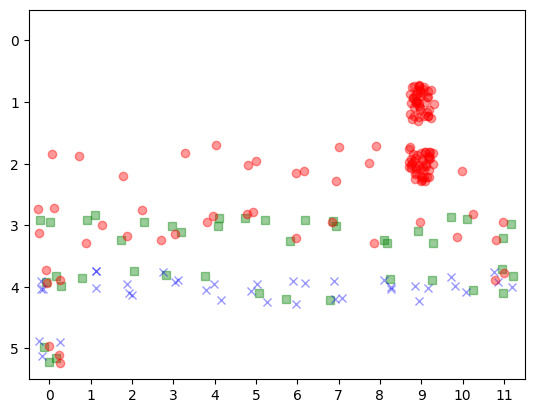

In [ ]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlim(-0.5, ncols-0.5)
ax.set_ylim(-0.5, nrows-0.5)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))

# Function to plot trajectories
def plot_swarm(trajectories, color, marker):
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            # Random jitter within the cell to avoid overlap
            jitter = .3
            jitter_x = np.random.uniform(-jitter, jitter)
            jitter_y = np.random.uniform(-jitter, jitter)
            ax.plot(col + jitter_x, row + jitter_y, marker=marker, color=color, alpha=0.4)

colors = ['red', 'blue', 'green']
markers = ['o', 'x', 's']
for trajectory_name in trajos.keys():
    plot_swarm(trajos[trajectory_name], colors.pop(), markers.pop())

ax.invert_yaxis()  # Invert the y-axis to match the matrix indexing

plt.show()

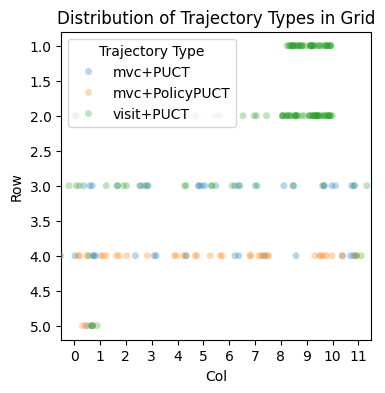

In [ ]:
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col


# Prepare DataFrame
data = []

for t_type, traj_list in trajos.items():
    for traj in traj_list:
        for state in traj:
            row, col = obs_to_cords(state, ncols)
            data.append({'Type': t_type, 'Row': row, 'Col': col})

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(4, 4))
sns.stripplot(data=df, x='Col', y='Row', hue='Type', jitter=1.0, dodge=False, marker='o', alpha=0.3)

plt.gca().invert_yaxis()  # Invert y-axis to align with typical matrix indexing
plt.legend(title='Trajectory Type')
plt.title('Distribution of Trajectory Types in Grid')
plt.show()